In [1]:
import xgboost as xg
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV,KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_percentage_error
import time

In [2]:
Train = pd.read_csv('Dcmd_dataset.csv')

In [3]:
x = Train.iloc[:,:-1].values
y = Train.iloc[:,-1].values

In [4]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=20)

In [5]:
params = {
     'learning_rate':[0.01,0.05,0.1],
     'max_depth':[3,5,7],
     'subsample':[0.6,0.8,1.0],
    'gamma':[0,0.5,1],
}
xgb = xg.XGBRegressor(n_estimators=1000)

In [6]:
kfold = KFold(n_splits=5, shuffle=True)
grid_search = GridSearchCV(xgb, param_grid=params,scoring='neg_mean_squared_error',cv=kfold)

In [7]:
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_

In [8]:
best_params

{'gamma': 0, 'learning_rate': 0.05, 'max_depth': 5, 'subsample': 0.6}

In [9]:
xgbr = xg.XGBRegressor(n_estimators=1000,**best_params)

In [10]:
initial = time.time()

In [11]:
xgbr.fit(X_train, y_train,early_stopping_rounds=10,eval_set=[(X_test,y_test)],verbose=False)

C:\Users\abhay\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.05, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=5, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=1000, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [12]:
print(time.time()-initial)

0.1724238395690918


In [13]:
y_pred_test=xgbr.predict(X_test)
y_pred_train=xgbr.predict(X_train)

In [14]:
print(r2_score(y_test,y_pred_test))
print(mean_squared_error(y_test,y_pred_test))
print(mean_absolute_percentage_error(y_test,y_pred_test))

0.9471860806636468
0.016704382512096775
0.029003836270143184


In [15]:
print(r2_score(y_train,y_pred_train))
print(mean_squared_error(y_train,y_pred_train))
print(mean_absolute_percentage_error(y_train,y_pred_train))

0.9999939660086522
1.8968469866721579e-06
0.00022049269725976062


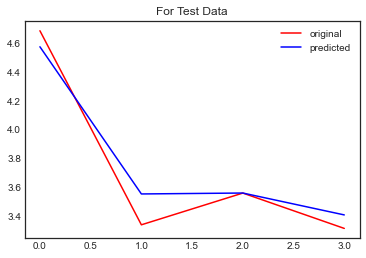

In [16]:
plt.style.use('seaborn-white')
x_ax = range(len(y_test))
plt.plot(x_ax,y_test,label='original',c='red')
plt.plot(x_ax,y_pred_test,label='predicted',c='blue')
plt.title("For Test Data")
plt.legend()

plt.show()

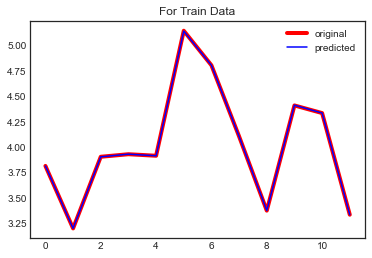

In [17]:
plt.style.use('seaborn-white')
x_ax = range(len(y_train))
plt.plot(x_ax,y_train,label='original',c='red',linewidth=4)
plt.plot(x_ax,y_pred_train,label='predicted',c='blue')
plt.title("For Train Data")
plt.legend()
plt.show()

In [18]:
RD = ((y_pred_train-y_train)*100)/y_train
RD1 = ((y_pred_test-y_test)*100)/y_test

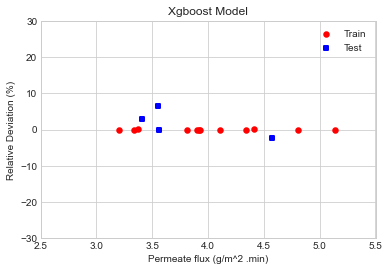

In [22]:

plt.xlim(2.5,5.5)
plt.ylim(-30,30)
plt.scatter(y_pred_train,RD,c="red",marker='o',linewidths=2,s=20,label='Train')
plt.scatter(y_pred_test,RD1,c="blue",marker='s',linewidths=2,s=20,label='Test')
plt.xlabel("Permeate flux (g/m^2 .min)")
plt.ylabel("Relative Deviation (%)")
plt.title("Xgboost Model")
plt.legend()
plt.style.use('seaborn-whitegrid')
plt.show()

In [20]:
np.set_printoptions(precision=2)
print("Train data comparasion")
print("\n\n\n FT     FF   Con   PT   predicted Actual")
print(np.concatenate((X_train,y_pred_train.reshape(len(y_pred_train),1),y_train.reshape(len(y_train),1)),1))

Train data comparasion



 FT     FF   Con   PT   predicted Actual
[[65.    1.   20.   15.    3.81  3.81]
 [65.    0.8  15.   18.    3.2   3.2 ]
 [70.    0.8  20.   12.    3.9   3.9 ]
 [60.    1.2  20.    9.    3.93  3.93]
 [60.    1.    5.   18.    3.91  3.92]
 [70.    1.4   5.   15.    5.14  5.14]
 [65.    1.4  10.    9.    4.8   4.8 ]
 [60.    1.4  15.   12.    4.11  4.11]
 [55.    0.8   5.    9.    3.38  3.38]
 [70.    1.2  10.   18.    4.41  4.41]
 [70.    1.   15.    9.    4.34  4.33]
 [55.    1.4  20.   18.    3.33  3.33]]


In [21]:
np.set_printoptions(precision=2)
print("Test data comparasion")
print("\n\n\n FT     FF   Con   PT   predicted Actual")
print(np.concatenate((X_test,y_pred_test.reshape(len(y_pred_test),1),y_test.reshape(len(y_test),1)),1))

Test data comparasion



 FT     FF   Con   PT   predicted Actual
[[65.    1.2   5.   12.    4.57  4.68]
 [55.    1.   10.   12.    3.55  3.34]
 [60.    0.8  10.   15.    3.56  3.56]
 [55.    1.2  15.   15.    3.41  3.31]]
